In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

### Loading url

In [2]:
def table_summary(data_frame: pd.DataFrame, only_missing_data = True):

  data_types = []
  for col in data_frame.columns:
    data_types.append(data_frame[col].dtypes)
    
    
  data_frame = data_frame.isnull()

  table = pd.DataFrame(columns=['Columns','Data_type', "Missing_data", "Available_data", "Total"])
  table = table.loc[:0]
  
  record = []
  missing_value = 0
  available = 0
  
  for i, column in enumerate(data_frame.columns.values.tolist()):
    type = data_types[i]
    for row in data_frame[column]:
      if row == True:
        missing_value += 1
      else:
        available +=1
    
    record.append(column)
    record.append(type)
    record.append(missing_value)
    record.append(available)
    record.append(missing_value + available)

    table.loc[len(table)] = record
    
    # reset
    missing_value = 0
    available = 0
    record = []
    type = ""
  
  if only_missing_data:
    return table[table['Missing_data'] > 0]
  else:
    return table
  

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(url)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [5]:
df['peak-rpm'].dtypes

dtype('float64')

## Correlation 

In [6]:
# Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### Positive Linear Relationship

Let's find the scatterplot of "engine-size" and "price".

(0.0, 53052.151303889616)

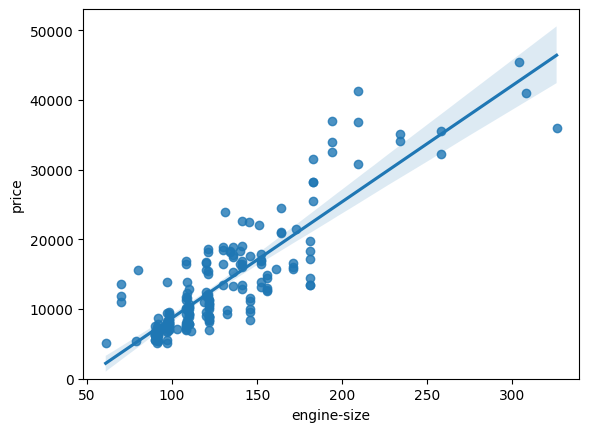

In [7]:
# Engine size as potential predictor variable of price
sns.regplot(x='engine-size', y='price', data=df)

plt.ylim(0,)

In [8]:
# We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.

df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### summary
As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87.

## Testing 'Highway-mpg' and 'Price'


Highway mpg is a potential predictor variable of price. Let's find the scatterplot of "highway-mpg" and "price".

In [9]:
# We can examine the correlation between 'highway-mpg' and 'price'

df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

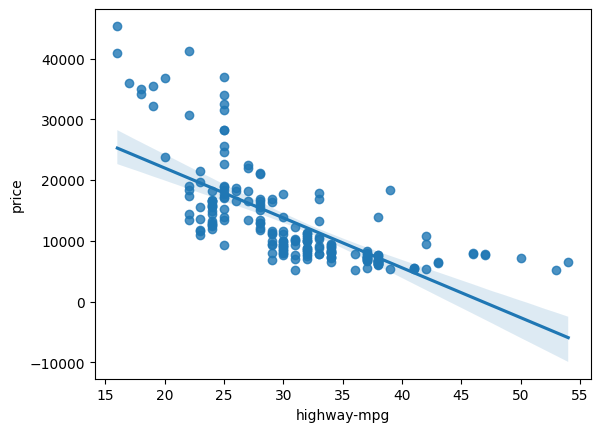

In [10]:
sns.regplot(x='highway-mpg', y='price', data=df)

#### Summary
<p>
  As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.
<p>

## Check for 'Peak-rpm' and 'Price'

<Axes: xlabel='peak-rpm', ylabel='price'>

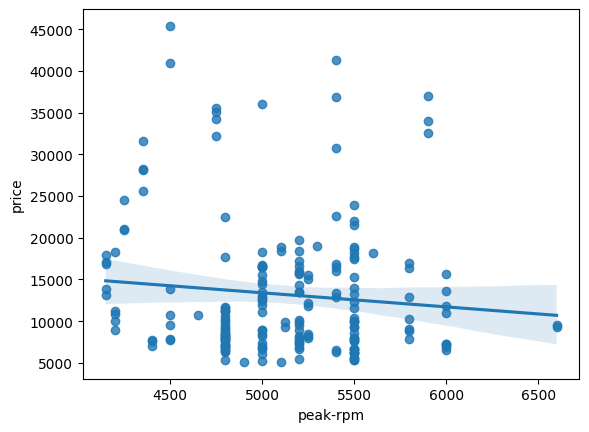

In [11]:
# Let's see if "peak-rpm" is a predictor variable of "price".

sns.regplot(x='peak-rpm', y='price', data=df)

In [12]:
# Let examine the correlation
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### Summary

- Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. 
- Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.
- The correlation is __-0.101616__. It shows that is not reliable variable for price predictor.

# Check for 'Stroke' and 'Price'

In [13]:
# Find the correlation between x="stroke" and y="price".
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='stroke', ylabel='price'>

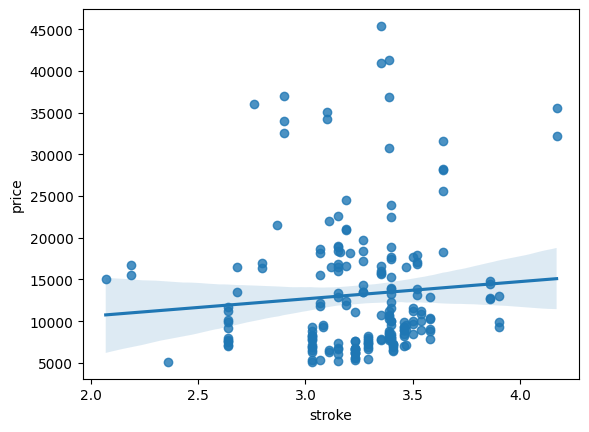

In [14]:
sns.regplot(x='stroke', y='price', data=df)

### Sumaary
There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. We can see this using "regplot" to demonstrate this.

#  Categorical Variables

### "body-style" and "price"

<Axes: xlabel='body-style', ylabel='price'>

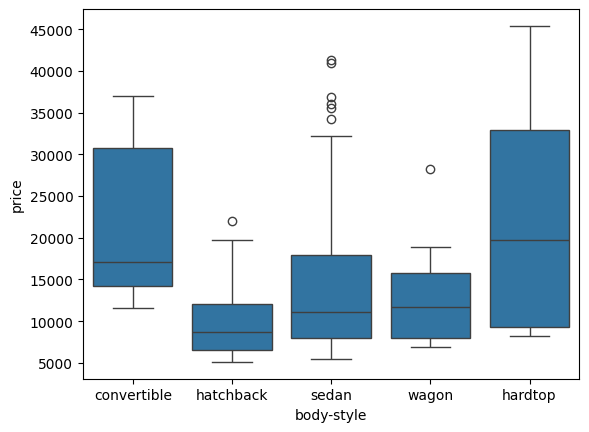

In [15]:
#  Let's look at the relationship between "body-style" and "price"
sns.boxplot(x='body-style', y='price', data=df)

#### Summary

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

### Let's examine engine "engine-location" and "price":

<Axes: xlabel='engine-location', ylabel='price'>

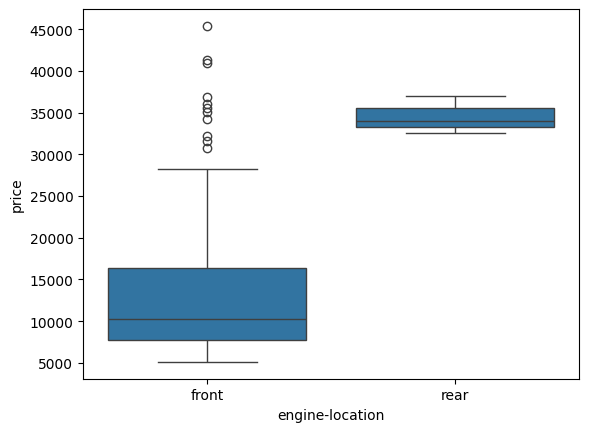

In [16]:
sns.boxplot(x='engine-location', y='price', data=df)

#### Summary

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

### Let's examine "drive-wheels" and "price".

<Axes: xlabel='drive-wheels', ylabel='price'>

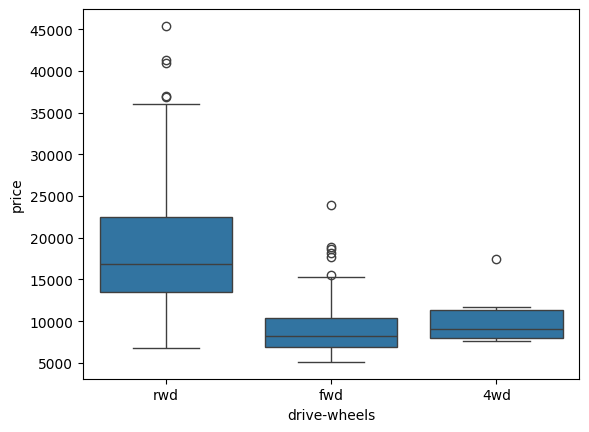

In [17]:
# drive-wheels
sns.boxplot(x='drive-wheels', y='price', data=df)

#### Summary
Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

# Descriptive Statistical Analysis

In [18]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [19]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


# Value Counts

In [20]:
df[['drive-wheels']].value_counts()

drive-wheels
fwd             118
rwd              75
4wd               8
Name: count, dtype: int64

### We can convert the series to a dataframe as follows:

In [21]:
drive_wheel_counts = df[['drive-wheels']].value_counts() \
  .to_frame() \
  .rename(columns={"count": "value_counts"})

drive_wheel_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


## Value counts for engine location

In [22]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame().rename(columns={"counts": "value_counts"})

engine_loc_counts

,count
engine-location,
front,198
rear,3


#### Summary
After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. 

This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

# Basics of Grouping

### Unique items

In [23]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

### Groupby

In [24]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]

df_group_one.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [25]:
df_group1 = df_group_one[['drive-wheels', 'price']].groupby(['drive-wheels'], as_index=False).mean()

df_group1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [26]:
df_group2 = df_group_one.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

df_group2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### Transform to pivot table

In [27]:
group_pivot = df_group2.pivot(index='drive-wheels', columns='body-style').fillna(0)
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question 4:</h1>

<p>Use the "groupby" function to find the average "price" of each car based on "body-style".</p>
</div>

In [28]:
df_body_style = df[['body-style', 'price']].groupby(['body-style'], as_index=False)\
  .mean() \
  .rename(columns={"price": "avg_price"}) \
  .sort_values(['avg_price'], ascending=False)

df_body_style

,body-style,avg_price
1,hardtop,22208.500000
0,convertible,21890.500000
3,sedan,14459.755319
4,wagon,12371.960000
2,hatchback,9957.441176


# Heat Map

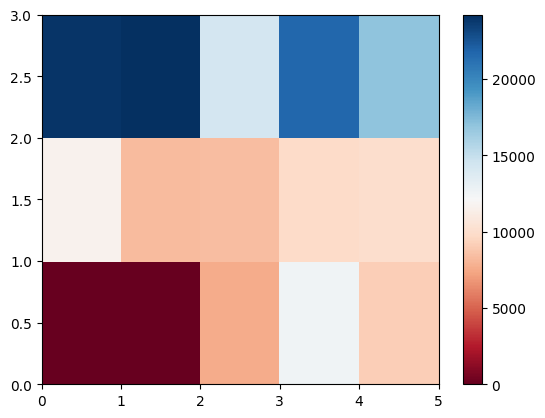

In [29]:
#use the grouped results
plt.pcolor(group_pivot, cmap='RdBu')
plt.colorbar()

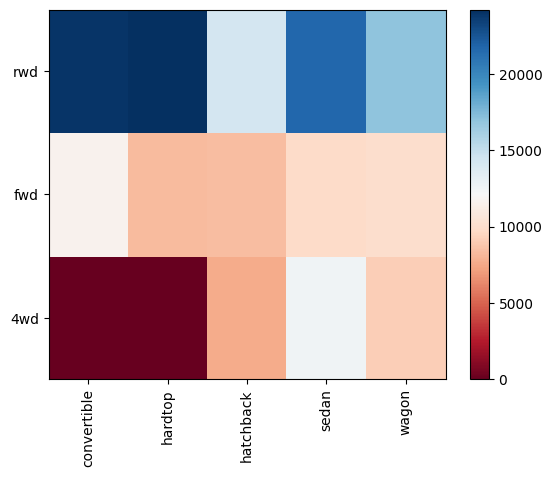

In [30]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='RdBu')

#label names
row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlation and Causation

<b>Correlation:</b> a measure of the extent of interdependence between variables.

<b>Causation:</b> the relationship between cause and effect between two variables.

### Pearson Correlation
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

### P-Value
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>



#### Wheel-Base vs. Price

In [31]:
coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])

print("Pearson Coefficent:", coef,'\n', "P_Value:", p_value)

Pearson Coefficent: 0.584641822265508 
 P_Value: 8.076488270732947e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


### Horsepower vs. Price

In [32]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259526e-48


### Length vs. Price

In [35]:
cf, p_value = stats.pearsonr(df['length'], df['price'])
print("coefficient:", cf, "P_value:", p_value)
df[['length', 'price']].corr()

coefficient: 0.6906283804483639 P_value: 8.016477466159153e-30


,length,price
length,1.000000,0.690628
price,0.690628,1.000000


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

### Width vs. Price

In [36]:
cf, p_value = stats.pearsonr(df['width'], df['price'])
print("coefficient:", cf, "P_value:", p_value)

coefficient: 0.7512653440522672 P_value: 9.200335510482065e-38


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-Weight vs. Price

In [37]:
cf, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("coefficient:", cf, "P_value:", p_value)

coefficient: 0.8344145257702843 P_value: 2.189577238893972e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

### Engine-Size vs. Price

In [38]:
cf, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("coefficient:", cf, "P_value:", p_value)

coefficient: 0.8723351674455182 P_value: 9.265491622200262e-64


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

### Bore vs. Price

In [39]:
cf, p_value = stats.pearsonr(df['bore'], df['price'])
print("coefficient:", cf, "P_value:", p_value)

coefficient: 0.5431553832626604 P_value: 8.04918948393533e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>

### City-mpg vs. Price

In [40]:
cf, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("coefficient:", cf, "P_value:", p_value)

coefficient: -0.6865710067844678 P_value: 2.321132065567512e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>

### Highway-mpg vs. Price

In [41]:
cf, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("coefficient:", cf, "P_value:", p_value)

coefficient: -0.7046922650589529 P_value: 1.7495471144476325e-31


#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.